# 1. Problem definiton


The problem I will be solving is a binary classification. We will use the data attributes to predict whether the patient has diabetes or not. 
- `Given the patient data record, can we predict if the patient has diabetes? `

# 2. Data 
I've downloaded the data from [Kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database)

- The data containts several constraints 
  - The data is a small sample from a larger database
  - All patients are at lest 21 years old of pima Indian heritage
  
- The data has one dependent variable and several independent variables.
  - dependent variables
     - Outcome 
  - independent variables 
     - pregnancies
     - glucose 
     - blood pressure
     - skin thickness
     - insulin
     - BMI
     - Diabetes Pedigree
     - Age
     

# 3.  Evaluation

If we reach 90% accuracy I will consider this a success

# 4. Features 

- Outcome - has diabetes (1 = yes or 0 = no)
The following are the features to predict the outcome variable (has diabetes or does not have diabetes)
- pregnancies - number of times pregnant
- glucose - plasma glucose concentration a 2 hours in oral glucose tolerant test
- blood pressure - diastolic blood pressure (mm Hg)
- skin thickness - triceps skin fold thickness (mm)
- insulin - 2 hour serum insulin (mu U/ml)
- BMI - Body mass index (weight in kg/(height in m)^2)
- Diabetes Pedigree - diabetes pedegree function
- Age - age of the patient.


In [12]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, recall_score, f1_score, classification_report, plot_roc_curve

In [13]:
try:
    import common
    DATA = common.DataDirectory()
except ImportError:
    DATA = Path().home() / '/Users/cristophernimatuj/Desktop/jupyter/Jupyter_notebook/Datasets/'

In [14]:
DIABETES = DATA / 'Fix_na_values_diabetes.csv'

In [15]:
df = pd.read_csv(DIABETES)

In [16]:
df.head(10)

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.000,35.000,170.67,33.600,0.627,50,1
1,1,1,85.0,66.000,29.000,101.98,26.600,0.351,31,0
2,2,8,183.0,64.000,32.811,170.67,23.300,0.672,32,1
3,3,1,89.0,66.000,23.000,94.00,28.100,0.167,21,0
4,4,0,137.0,40.000,35.000,168.00,43.100,2.288,33,1
5,5,5,116.0,74.000,27.004,101.98,25.600,0.201,30,0
6,6,3,78.0,50.000,32.000,88.00,31.000,0.248,26,1
7,7,10,115.0,69.254,27.004,101.98,35.300,0.134,29,0
8,8,2,197.0,70.000,45.000,543.00,30.500,0.158,53,1
9,9,8,125.0,96.000,32.811,170.67,34.759,0.232,54,1


In [17]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [18]:
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,170.67,33.6,0.627,50,1
1,1,85.0,66.0,29.0,101.98,26.6,0.351,31,0


In [19]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [20]:
df['Outcome'].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

# hmm the data is not balanced 
Macro avg - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn't take class imbalance into effect. So if you do have class imbalances (more examples of one class than another), you should pay attention to this.

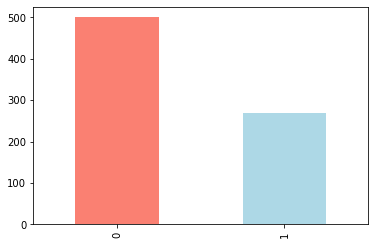

In [21]:
df['Outcome'].value_counts().plot(kind = 'bar', color = ['salmon', 'lightblue'] );

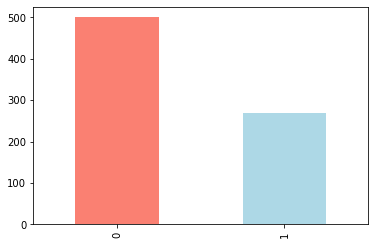

In [22]:
df['Outcome'].value_counts().plot.bar(color = ['salmon', 'lightblue'] );

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [24]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.690520,72.365263,29.183495,141.804349,32.451393,0.471876,33.240885,0.348958
std,3.369578,30.472792,12.109315,8.924791,89.238616,6.877057,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,101.980000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,28.000000,101.980000,32.050000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.811000,170.670000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<!-- ### for col_attr in df.columns:
    print(f'columns value count for ***{col_attr}:***')
    print(df[col_attr].value_counts()) -->

In [25]:
df['Pregnancies'].value_counts(normalize=True)

1     0.175781
0     0.144531
2     0.134115
3     0.097656
4     0.088542
5     0.074219
6     0.065104
7     0.058594
8     0.049479
9     0.036458
10    0.031250
11    0.014323
13    0.013021
12    0.011719
14    0.002604
15    0.001302
17    0.001302
Name: Pregnancies, dtype: float64

- about `45%` of the patients had less than 3 pregnancies 
- about `30%` of the patient records had between 3 and 6 pregnancies

During pregnancy, your placenta makes hormones that cause glucose to build up in your blood. Usually, your pancreas can send out enough insulin to handle it. But if your body can't make enough insulin or stops using insulin as it should, your blood sugar levels rise, and you get gestational diabetes
accoding to [webmd](https://www.webmd.com/diabetes/gestational-diabetes#:~:text=During%20pregnancy%2C%20your%20placenta%20makes,and%20you%20get%20gestational%20diabetes)

In [26]:
Prego_diabetes = pd.crosstab(index=df['Pregnancies'], columns=df['Outcome'])
Prego_diabetes

Outcome,0,1
Pregnancies,,
0,73,38
1,106,29
2,84,19
3,48,27
4,45,23
5,36,21
6,34,16
7,20,25
8,16,22


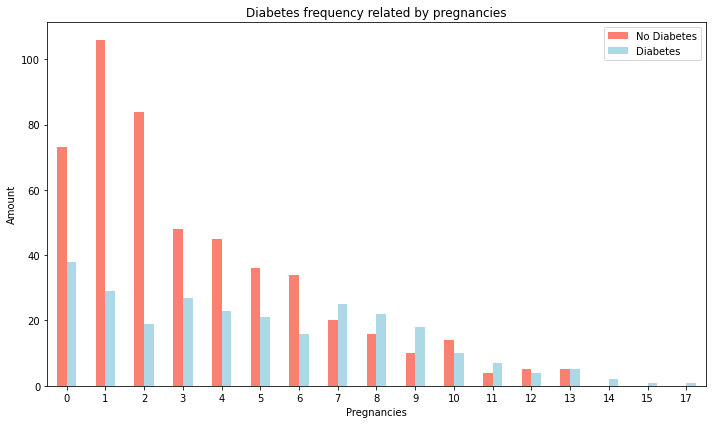

In [27]:
pd.crosstab(df.Pregnancies, df.Outcome).plot(kind='bar',
                                            figsize = (10,6),
                                            color = ['salmon', 'lightblue'])
plt.title('Diabetes frequency related by pregnancies')
plt.xlabel('Pregnancies')
plt.ylabel('Amount')
plt.legend(['No Diabetes', 'Diabetes'])
plt.xticks(rotation=0) # keeps the numbers looking upright 
plt.tight_layout()
plt.show()

the more pregnancies the patient has the more chances of getting diabetes

since we know that during pregnancies the glucose increase let's make a scatter plot to see if we can find patterns

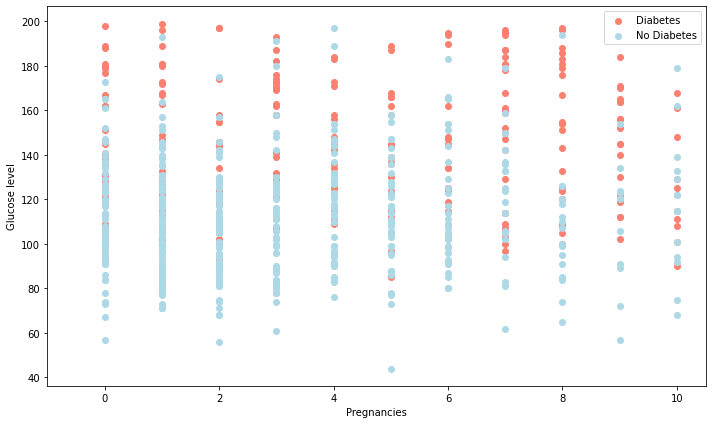

In [28]:
plt.figure(figsize=(10,6))

plt.scatter(df.Pregnancies[df.Outcome == 1],
           df.Glucose[df.Outcome ==1],
           color = 'salmon')

plt.scatter(df.Pregnancies[df.Outcome == 0],
           df.Glucose[df.Outcome ==0 ],
           color = 'lightblue')
plt.xlim(-1, 10.5)

plt.legend(['Diabetes', 'No Diabetes'])
plt.xlabel('Pregnancies')
plt.ylabel('Glucose level')

plt.tight_layout()
plt.show()

array([<AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>], dtype=object)

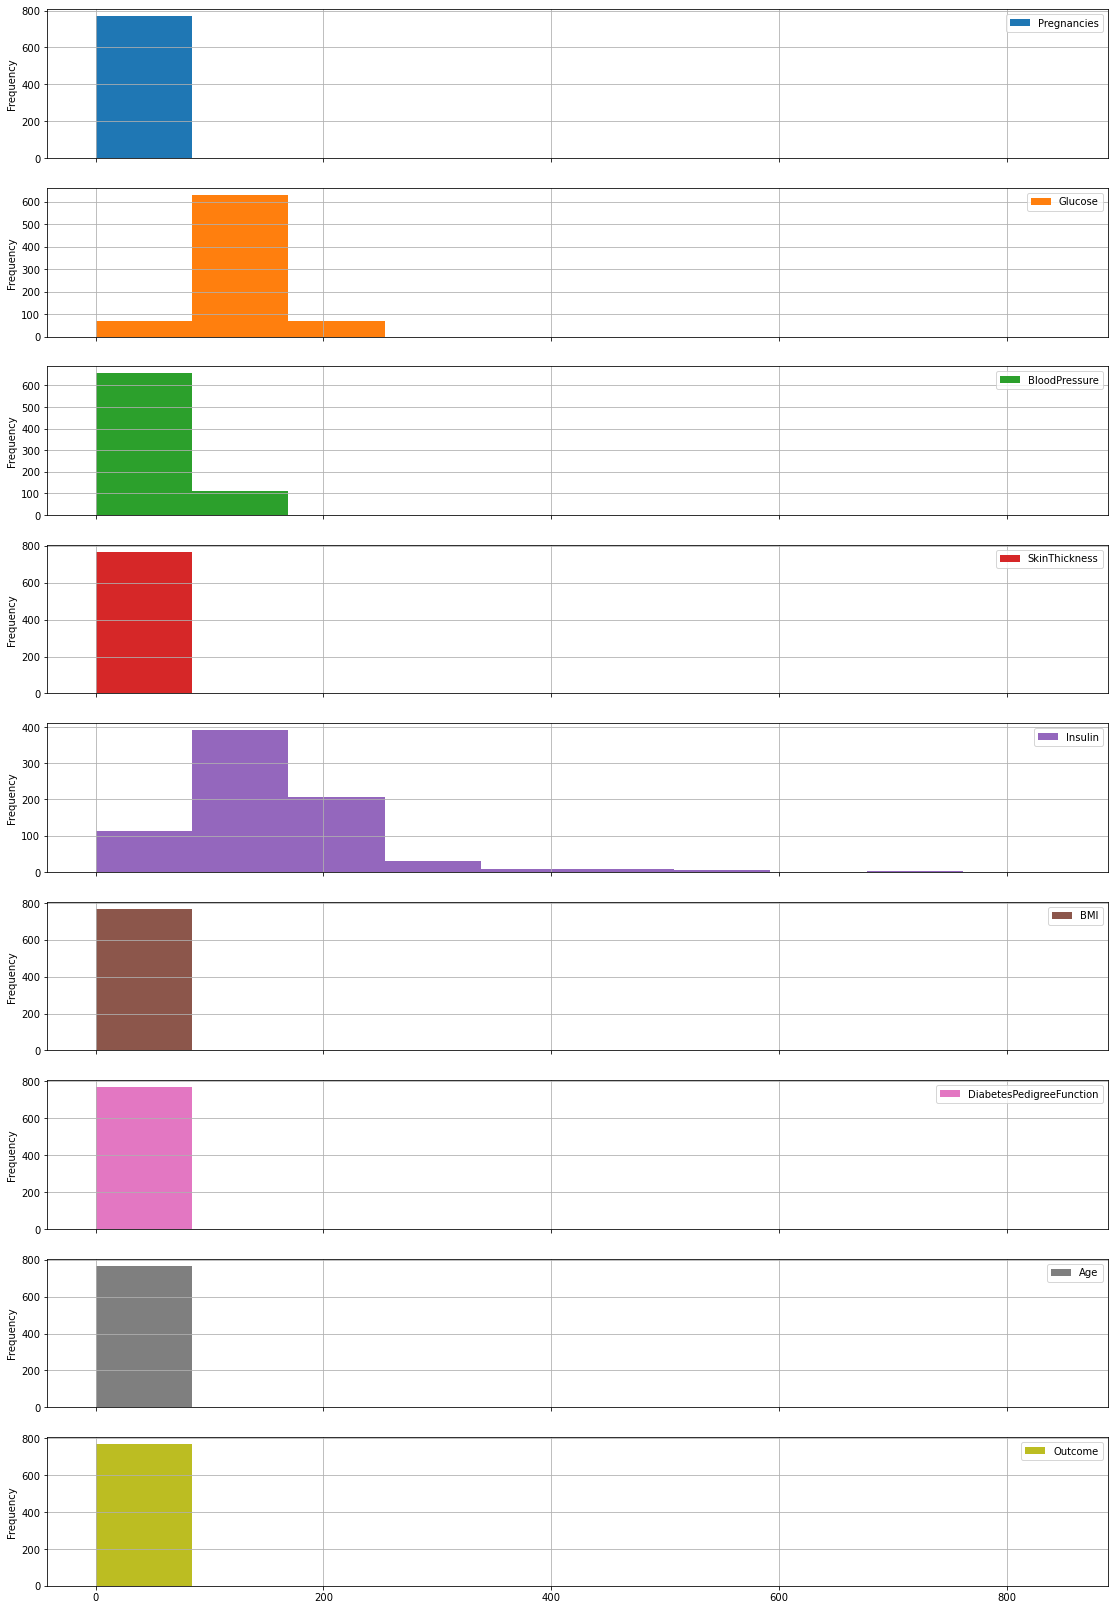

In [29]:
df.plot.hist(subplots = True, grid= True, figsize=(19,29))

In [30]:
def plt_hist(df):
    for i in df.columns:
        plt.figure()
        plt.hist(df[i])
        plt.title(f'{i}')

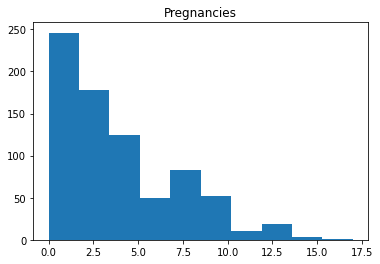

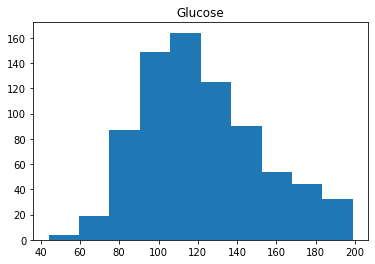

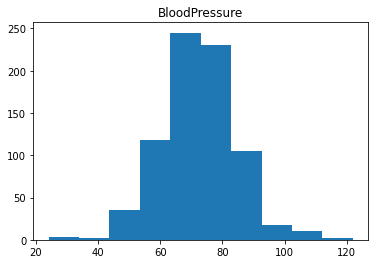

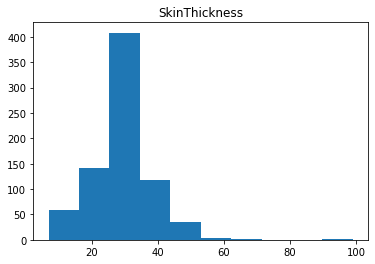

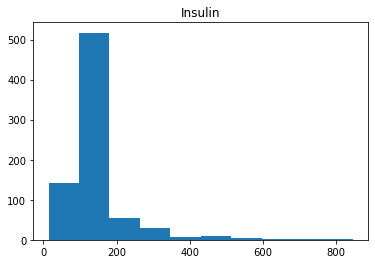

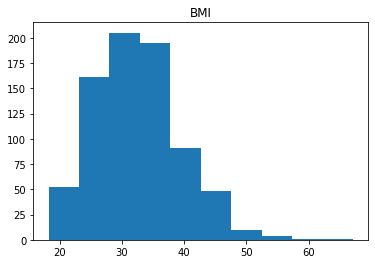

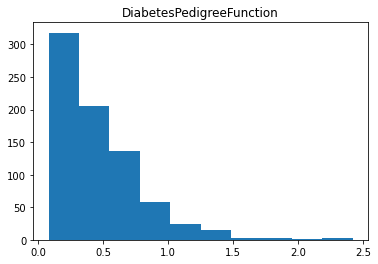

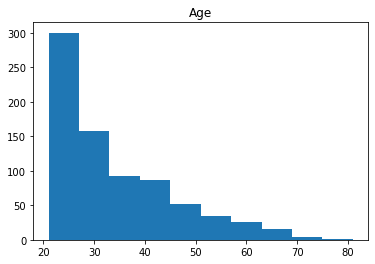

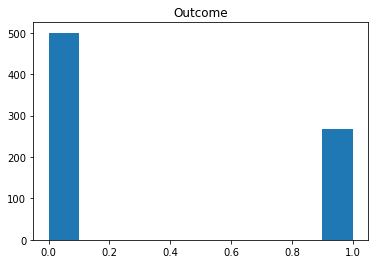

In [31]:
plt_hist(df)

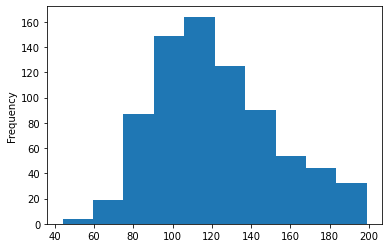

In [32]:
df.Glucose.plot.hist();

<AxesSubplot:ylabel='Frequency'>

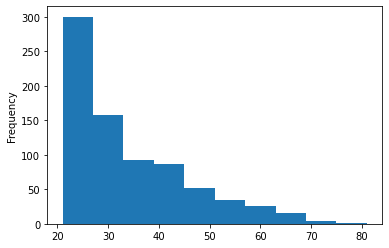

In [33]:
df.Age.plot.hist()

- we can see that glucose, Bloodpressure, and BMI have a normal distribution (cow bell shape)

In [34]:
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,170.67,33.6,0.627,50,1
1,1,85.0,66.0,29.0,101.98,26.6,0.351,31,0


In [35]:
pd.crosstab(df.Age[df.Age < 30], df.Outcome)

Outcome,0,1
Age,,
21,58,5
22,61,11
23,31,7
24,38,8
25,34,14
26,25,8
27,24,8
28,25,10
29,16,13


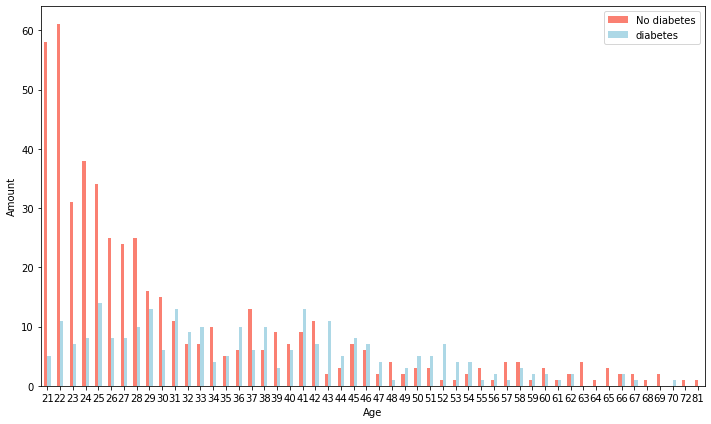

In [36]:
pd.crosstab(df.Age, df.Outcome).plot(kind='bar',
                                    figsize=(10,6),
                                     color=['salmon', 'lightblue'])

# plt.ylim(0,40)
# plt.xlim([-1 ,10])
plt.ylabel('Amount')
plt.xticks(rotation=0)
plt.legend(['No diabetes', 'diabetes'])
plt.tight_layout()
plt.show()

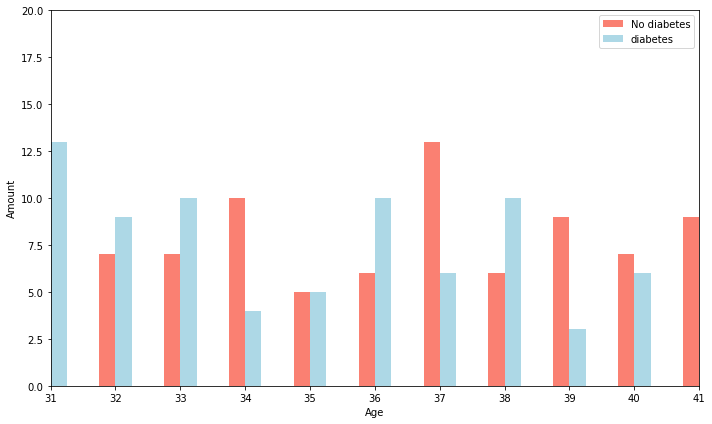

In [37]:
pd.crosstab(df.Age, df.Outcome).plot(kind='bar',
                                                 figsize=(10,6),
                                     color=['salmon', 'lightblue'])

plt.ylim(0, 20)
plt.xlim(10, 20)
plt.ylabel('Amount')
plt.xticks(rotation=0)
plt.legend(['No diabetes', 'diabetes'])
plt.tight_layout()
plt.show()

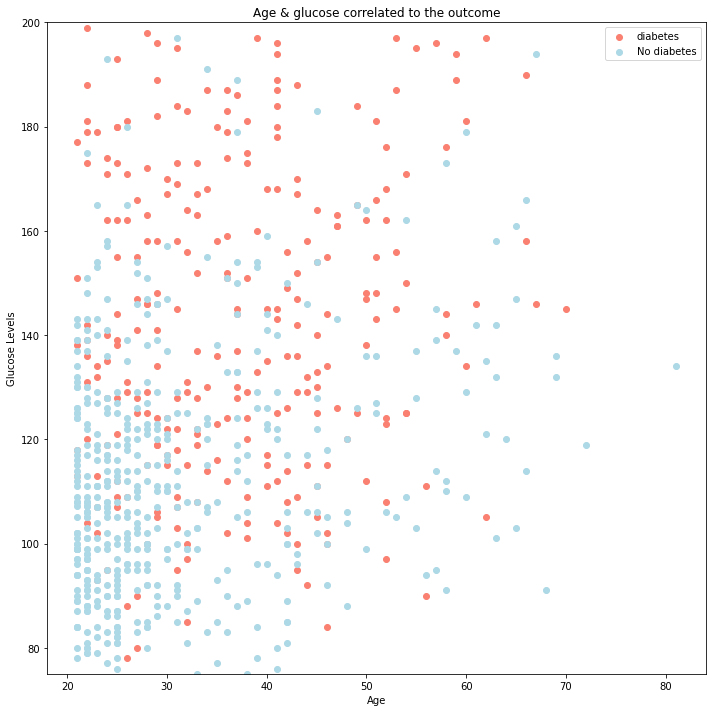

In [38]:
plt.figure(figsize=(10,10))

plt.scatter(df.Age[df.Outcome == 1], df.Glucose[df.Outcome ==1], color = 'salmon')

plt.scatter(df.Age[df.Outcome == 0],
           df.Glucose[df.Outcome == 0],
           color = 'lightblue')
plt.ylim(75, 200)
plt.legend(['diabetes', 'No diabetes'])
plt.title('Age & glucose correlated to the outcome')
plt.ylabel('Glucose Levels')
plt.xlabel('Age')
plt.tight_layout()
plt.show()

In [39]:
corr_matrix = df.corr()
corr_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.130314,0.209297,0.092556,0.059590,0.023450,-0.033523,0.544341,0.221898
Glucose,0.130314,1.000000,0.225883,0.235233,0.491337,0.235116,0.138388,0.269027,0.496420
BloodPressure,0.209297,0.225883,1.000000,0.202278,0.071231,0.287033,-0.000837,0.325529,0.174906
SkinThickness,0.092556,0.235233,0.202278,1.000000,0.203664,0.566442,0.104147,0.133518,0.308186
Insulin,0.059590,0.491337,0.071231,0.203664,1.000000,0.238768,0.147217,0.124237,0.381030
BMI,0.023450,0.235116,0.287033,0.566442,0.238768,1.000000,0.152748,0.026961,0.314314
DiabetesPedigreeFunction,-0.033523,0.138388,-0.000837,0.104147,0.147217,0.152748,1.000000,0.033561,0.173844
Age,0.544341,0.269027,0.325529,0.133518,0.124237,0.026961,0.033561,1.000000,0.238356
Outcome,0.221898,0.496420,0.174906,0.308186,0.381030,0.314314,0.173844,0.238356,1.000000


In [40]:
def corr_matrix_plt(df):
    df = df.corr()
    plt.figure(figsize=(10,10)),
    sns.heatmap(df, annot=True, # annot= True makes the numbers inside the squares come up
               linewidths=0.5, # the white line widht between the squares
               fmt = '.2f',
               cmap="YlGnBu")

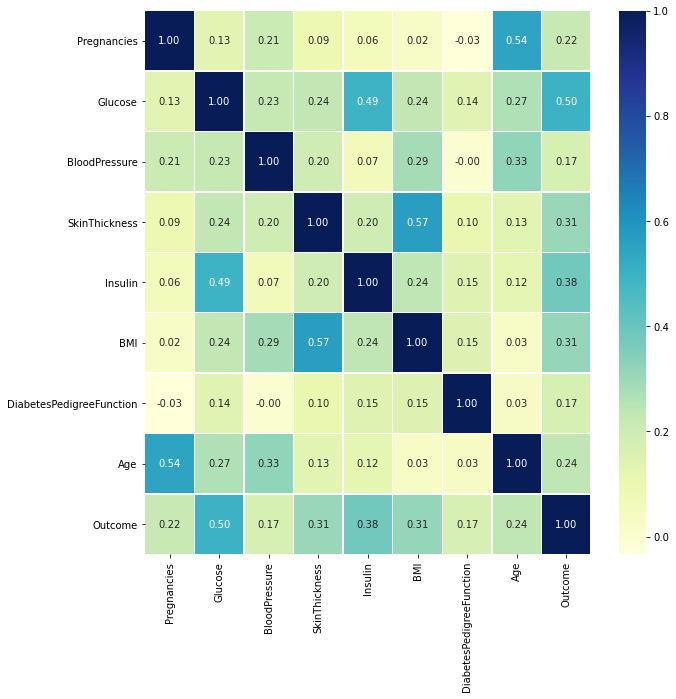

In [41]:
corr_matrix_plt(df)

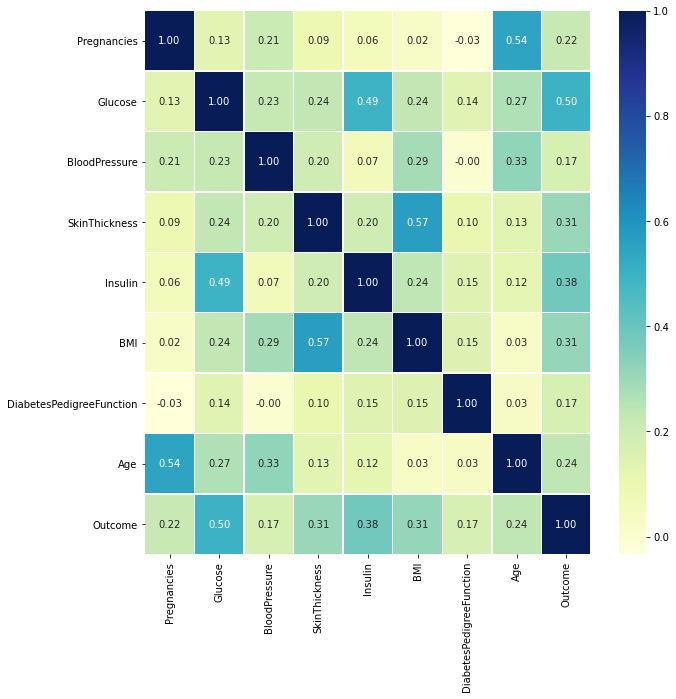

In [42]:
corr_matrix_plt(df)

In [43]:
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,170.67,33.6,0.627,50,1
1,1,85.0,66.0,29.0,101.98,26.6,0.351,31,0


In [44]:
# setting up the X, y variables
np.random.seed(24)
X = df.drop('Outcome', axis =1)
y = df.Outcome.values # makes an array instead of a Series

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)



In [45]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

# model choices 

1. logistic regression
2. K-nearest Neighbors 
3. random forest Classifiers


**diabetes datasets has 768 records**
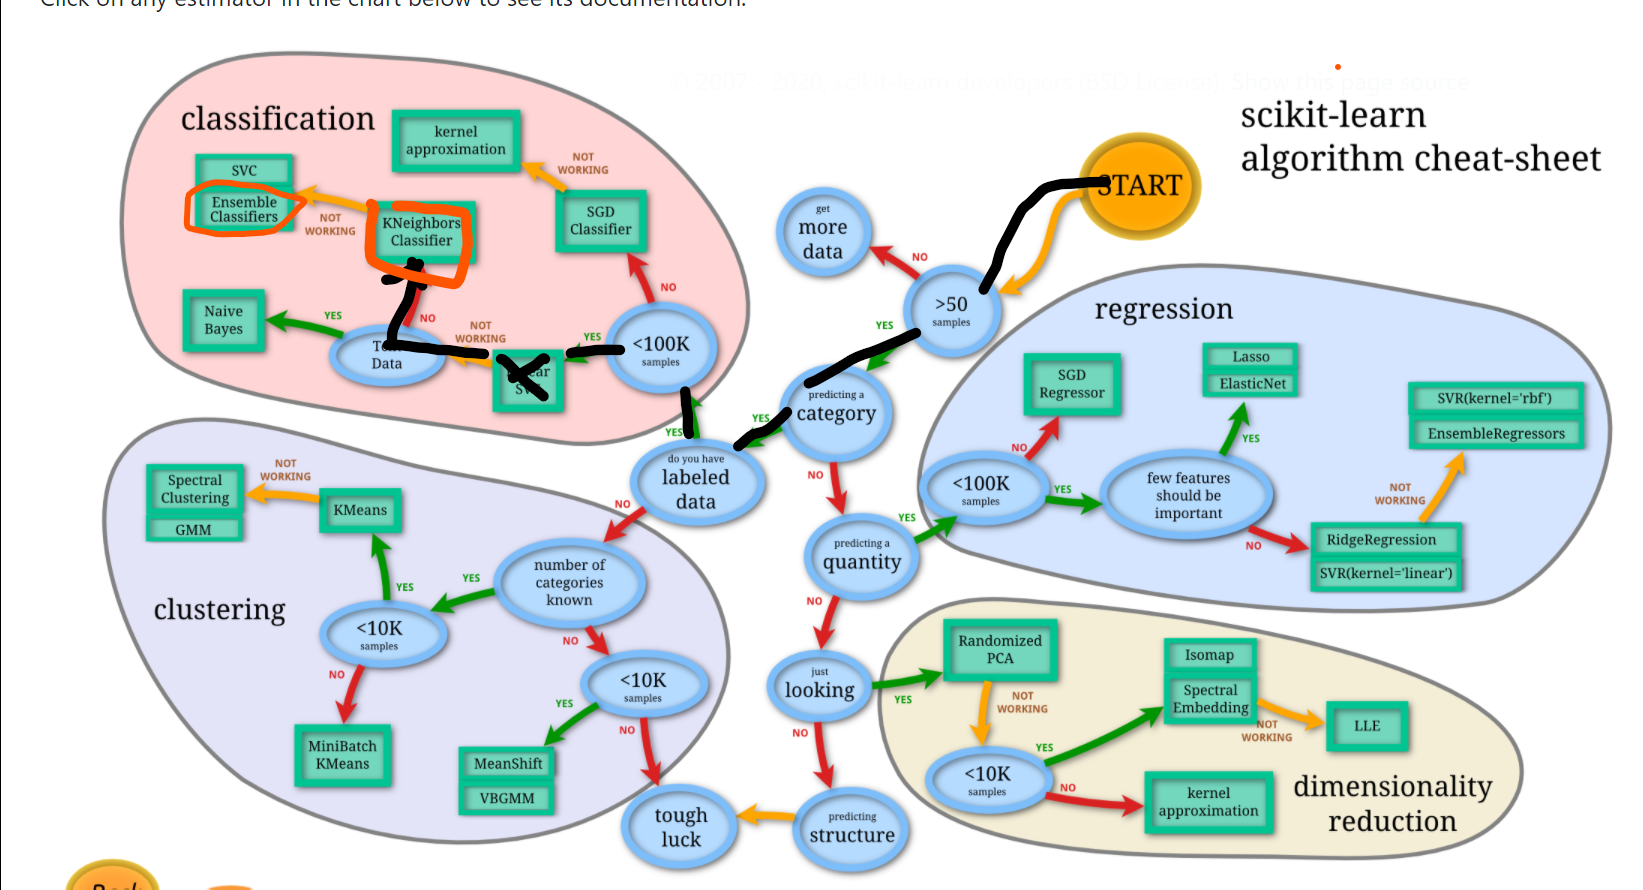

In [46]:
# making function for the models 

models = {
    'KNN': KNeighborsClassifier(n_neighbors=4),
    'Logistic regression': LogisticRegression(max_iter=100),
    'Random Forest': RandomForestClassifier()
}

def fit_and_score(models, X_train, X_test, y_train, y_test): 
    '''
    Make sure y is an array. ex df[col].value >> turn into an array
    Fits and evaluates given machine learning models.
    models: a dict of different scikit-learn machine learning models
    X_train: training data
    X_test: testing data
    y_train: labels associated with training data
    y_test: labels associated with testing data
    '''
    
    # Random seed for reproducible results
    np.random.seed(24) 
    # a list to keep models scores
    model_scores = {}
    #loop through models
    for name, model in models.items(): # key, values
        model.fit(X_train, y_train)
        # evalute the model according to the scores model
        model_scores[name] = model.score(X_test, y_test)
    return model_scores




In [47]:
model_scores = fit_and_score(models =models,
                             X_train= X_train,
                             X_test= X_test,
                            y_train = y_train,
                             y_test = y_test)
model_scores

/Users/cristophernimatuj/Desktop/jupyter/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.8311688311688312,
 'Logistic regression': 0.7077922077922078,
 'Random Forest': 0.8701298701298701}

In [48]:
model_scores = pd.DataFrame(model_scores, index=['Accuracy']) # each key makes a column, index makes it the row
model_scores

,KNN,Logistic regression,Random Forest
Accuracy,0.831169,0.707792,0.87013


In [49]:
def bar_plot(df):
    ax = df.plot(kind='bar', color = 'salmon')
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{height:.2f}', (x + width/2, y + height*1.02), ha='center')
    plt.legend(loc='best', bbox_to_anchor=(0.8, 0., 0.5, 0.5))
    plt.xticks(fontsize=14)
    for spine in plt.gca().spines.values():
        spine.set_visible(False)
    plt.yticks([])

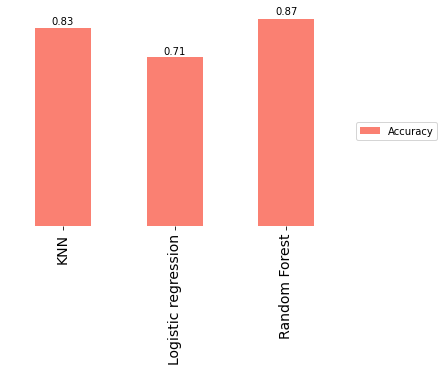

In [50]:
bar_plot(model_scores.T)

# manual tuning KNN hyperParameters

In [51]:
#list of train scores
train_scores = []

#list of test scores
test_scores = []

#create a list of neighbors
neighbors = range(1,21)

# setup algorithm
knn = KNeighborsClassifier()

# loop through different neighbor values
for i in neighbors:
    knn.set_params(n_neighbors = i)
    #training the model
    knn.fit(X_train, y_train)
    
    # appending scores to each list 
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

In [52]:
train_scores

[1.0,
 0.9234527687296417,
 0.9348534201954397,
 0.9055374592833876,
 0.8941368078175895,
 0.8859934853420195,
 0.8859934853420195,
 0.8908794788273615,
 0.8827361563517915,
 0.8827361563517915,
 0.8778501628664495,
 0.8811074918566775,
 0.8811074918566775,
 0.8859934853420195,
 0.8811074918566775,
 0.8762214983713354,
 0.8811074918566775,
 0.8762214983713354,
 0.8745928338762216,
 0.8762214983713354]

In [53]:
test_scores

[0.8246753246753247,
 0.8441558441558441,
 0.8441558441558441,
 0.8311688311688312,
 0.8376623376623377,
 0.8376623376623377,
 0.8376623376623377,
 0.8376623376623377,
 0.8311688311688312,
 0.8376623376623377,
 0.8311688311688312,
 0.8311688311688312,
 0.8376623376623377,
 0.8441558441558441,
 0.8571428571428571,
 0.8376623376623377,
 0.8311688311688312,
 0.8311688311688312,
 0.8311688311688312,
 0.8376623376623377]

Maximum KNN score on test score: 85.71%


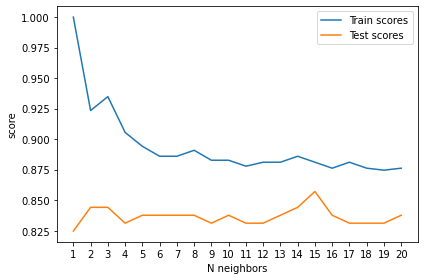

In [54]:
plt.plot(neighbors, train_scores, label='Train scores')
plt.plot(neighbors, test_scores, label = 'Test scores')

plt.xticks(np.arange(1, 21, 1)) #creating ticks to better visualize each data point in the graph 
plt.legend()
plt.xlabel('N neighbors')
plt.ylabel('score')
plt.tight_layout()

print(f'Maximum KNN score on test score: {max(test_scores)*100:.2f}%') # seeing our max score

In [55]:
model_scores

,KNN,Logistic regression,Random Forest
Accuracy,0.831169,0.707792,0.87013


- **we were able to improve our score from 0.66 to 0.74 using KNN** 
- **will tune more parameters if we are not able to improve our score using Logistic regression or RandomForestClassifier**

# tuning models with RandomizedSearchCV

In [56]:
log_reg_grid = {'C': np.logspace(-4,4, 20),
               'solver': ['liblinear']}

In [57]:
np.random.seed(24)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

#fitting random hyperparameter search model 
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [58]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 11.288378916846883}

In [59]:
rs_log_reg.score(X_test, y_test)

0.7272727272727273

In [60]:
model_scores

,KNN,Logistic regression,Random Forest
Accuracy,0.831169,0.707792,0.87013


# now we will do the same using Random forest classifier

In [61]:
rf_grid = {
    'n_estimators': np.arange(10,1000, 50),
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': np.arange(2, 20, 2),
    'min_samples_leaf': np.arange(1,20, 2)
}

In [62]:
np.random.seed(24)

rs_rfc = RandomizedSearchCV(RandomForestClassifier(),
                            param_distributions=rf_grid,
                             cv=5,
                             n_iter=20,
                             verbose = True)

rs_rfc.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [63]:
rs_rfc.best_params_

{'n_estimators': 160,
 'min_samples_split': 2,
 'min_samples_leaf': 5,
 'max_depth': 5}

In [64]:
print(rs_rfc.score(X_test,y_test), model_scores['Random Forest'])

0.8961038961038961 Accuracy    0.87013
Name: Random Forest, dtype: float64


In [65]:
model_scores

,KNN,Logistic regression,Random Forest
Accuracy,0.831169,0.707792,0.87013


# Using GridsearchedCV on Log_Reg

In [66]:
log_reg_grid = {
    'C': np.logspace(-4,4,30),
    'solver': ['liblinear']
}

gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)

gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [67]:
gs_log_reg.best_params_

{'C': 4.893900918477489, 'solver': 'liblinear'}

In [68]:
gs_log_reg.score(X_test, y_test)

0.7337662337662337

In [69]:
y_preds = gs_log_reg.predict(X_test)

In [70]:
y_preds

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0])

In [71]:
y_test

array([0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0])

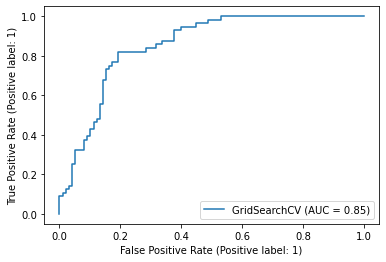

In [72]:
from sklearn.metrics import plot_roc_curve

ax = plot_roc_curve(gs_log_reg, X_test, y_test)


In [73]:
print(confusion_matrix(y_test, y_preds))

[[87 11]
 [30 26]]


In [74]:
def plot_conf_mat(y_test, y_preds):
    '''
    plots a confusion matrix using seaborn heatmap()
    '''
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                    annot=True,
                    cbar=False,
                    cmap='Blues')
    plt.xlabel('True labels')
    plt.ylabel('predicted labels')


In [76]:
def plot_conf_mat_labels(y_test, y_preds):
    '''
    plotting a confusin matrix with percentages using seabeon heatmap()
    '''
    cf_matrix = confusion_matrix(y_test, y_preds)

    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(cf_matrix/np.sum(cf_matrix),
                    annot=True,
                    cbar=False,
                     fmt='.2%',
                    cmap='Blues')    
    

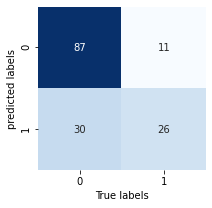

In [77]:
plot_conf_mat(y_test, y_preds)

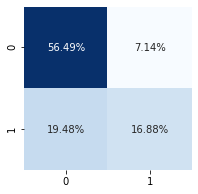

In [78]:
plot_conf_mat_labels(y_test ,y_preds)

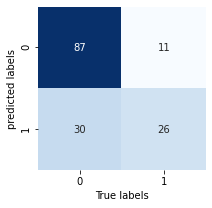

In [80]:
plot_conf_mat(y_test, y_preds)

**model predicted 11 times that the patient did not have diabetes when indeed they did have diabetes. Getting the number down to 0 is our main priority**

In [81]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.74      0.89      0.81        98
           1       0.70      0.46      0.56        56

    accuracy                           0.73       154
   macro avg       0.72      0.68      0.68       154
weighted avg       0.73      0.73      0.72       154



figure out the math to better understand the classificatio report

In [82]:
gs_log_reg.best_estimator_

LogisticRegression(C=4.893900918477489, solver='liblinear')

In [83]:
#instantiate best model with best hyperparameters using gridsearched
clf = LogisticRegression(C=9.236708571873866,
                        solver='liblinear')

In [84]:
def cross_val_score_metrics(estimator, X,y):
    '''
    Outputs a df of np.mean(cross_val_score(estimator, X, y, cv=5)) using scoring parameters of accuracy, precison, recall and f1.
    '''
    score_dict = {}
    
    score_dict['accuracy'] = np.mean(cross_val_score(estimator, X , y, cv=5, scoring='accuracy' ))
    score_dict['precision'] = np.mean(cross_val_score(estimator, X, y,cv=5, scoring='precision'))
    score_dict['recall'] = np.mean(cross_val_score(estimator, X, y, cv=5,scoring='recall'))
    score_dict['f1'] = np.mean(cross_val_score(estimator, X, y, cv=5, scoring='f1'))
    return pd.DataFrame(score_dict, index= [0])
    
    
    

In [85]:
cross_val_score(clf,X,y, cv=5, scoring='accuracy')

array([0.77272727, 0.74675325, 0.78571429, 0.79084967, 0.77777778])

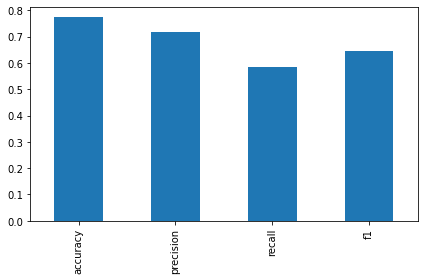

In [86]:
cv_metrics = cross_val_score_metrics(clf, X,y)
ax = cv_metrics.T.plot(kind='bar', legend= False)
plt.tight_layout()
plt.show()


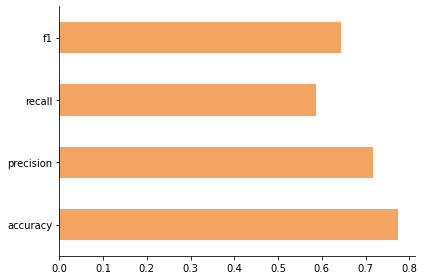

In [87]:
cv_metrics = cross_val_score_metrics(clf, X,y)
ax = cv_metrics.T.plot.barh(legend=None, color='sandybrown' )

top_side = ax.spines["top"]
top_side.set_visible(False)
right_side = ax.spines["right"]
right_side.set_visible(False)

plt.tight_layout()
plt.show()

In [88]:
clf.fit(X_train, y_train)

LogisticRegression(C=9.236708571873866, solver='liblinear')

In [89]:
# how much each column contributes to the outcome
clf.coef_

array([[ 0.11577723,  0.03293189, -0.01116029,  0.033417  ,  0.00414204,
         0.05757675,  0.74858918,  0.01333402]])

In [90]:
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'Pregnancies': 0.11577722807053967,
 'Glucose': 0.03293189002015329,
 'BloodPressure': -0.01116028577395359,
 'SkinThickness': 0.033416996380377574,
 'Insulin': 0.004142042717174851,
 'BMI': 0.057576750563999385,
 'DiabetesPedigreeFunction': 0.7485891781140701,
 'Age': 0.01333402050243155}

In [91]:
# list(clf.coef_[0]) --- grabs array [0] and to make it a list instead of the array

In [92]:
featues_df = pd.DataFrame(feature_dict, index =[0])
featues_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.115777,0.032932,-0.01116,0.033417,0.004142,0.057577,0.748589,0.013334


<AxesSubplot:title={'center':'Feature importance'}>

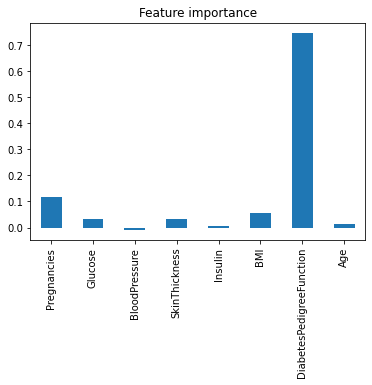

In [93]:
featues_df.T.plot.bar(title='Feature importance', legend=False)

In [94]:
pd.crosstab(index=df.Outcome, columns= df[df['DiabetesPedigreeFunction'] > 1.5]['Outcome'])

Outcome,0,1
Outcome,,
0,6,0
1,0,4


###  Random FOREST gets the highest score after fixing the data

In [95]:
gs_grid = {
    'n_estimators': [1000],
    'max_depth': [40, 70],
    'min_samples_split': np.arange(2, 20, 4),
    'min_samples_leaf': np.arange(1,20, 4)
}

In [96]:
np.random.seed(24)

gs_rfc = GridSearchCV(estimator=RandomForestClassifier(),
                            param_grid=gs_grid,
                             cv=5,
                             verbose = True)

gs_rfc.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [40, 70],
                         'min_samples_leaf': array([ 1,  5,  9, 13, 17]),
                         'min_samples_split': array([ 2,  6, 10, 14, 18]),
                         'n_estimators': [1000]},
             verbose=True)

In [97]:
gs_rfc.best_params_

{'max_depth': 40,
 'min_samples_leaf': 9,
 'min_samples_split': 6,
 'n_estimators': 1000}

In [98]:
print(gs_rfc.score(X_test,y_test), model_scores['Random Forest'])

0.8896103896103896 Accuracy    0.87013
Name: Random Forest, dtype: float64


In [99]:
 y_preds = gs_rfc.predict(X_test)

In [100]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91        98
           1       0.87      0.82      0.84        56

    accuracy                           0.89       154
   macro avg       0.88      0.88      0.88       154
weighted avg       0.89      0.89      0.89       154



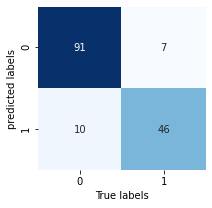

In [101]:
plot_conf_mat(y_test, y_preds)

#  testing hyper parameters for RandomForestClassifier

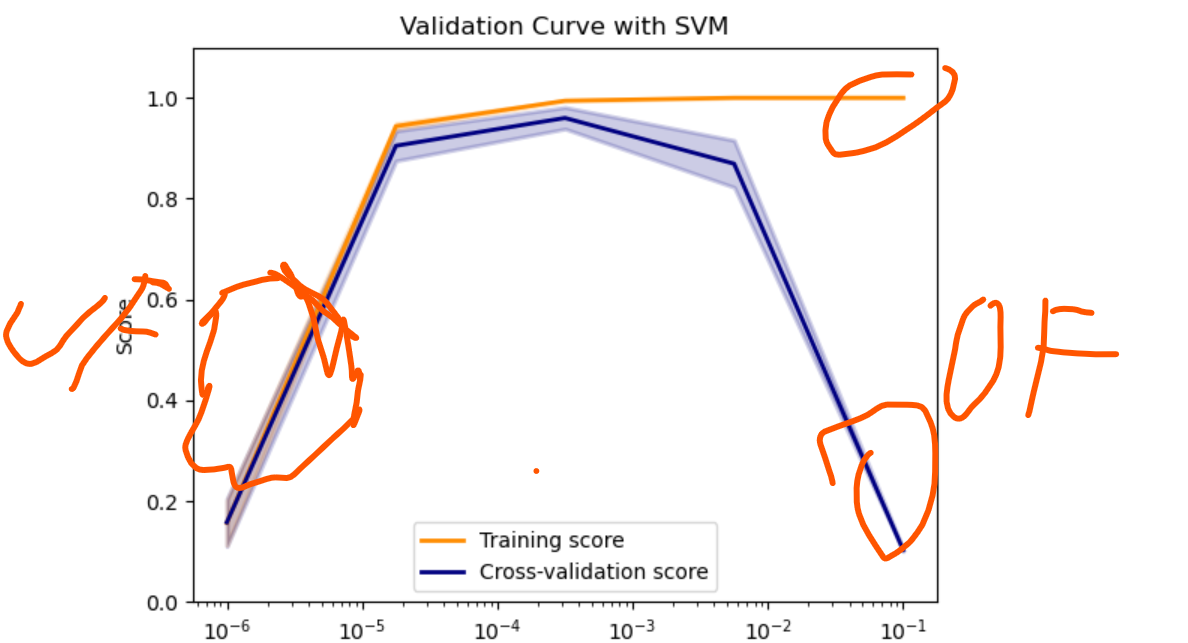

**If the training score and the validation score are both low, the estimator will be underfitting.** 
- If the training score is high and the validation score is low, the estimator is overfitting and otherwise it is working very well.
- A low training score and a high validation score is usually not possible. 
- Underfitting, overfitting, and a working model are shown in the in the plot above where we vary the parameter  of an SVM on the digits dataset.

In [102]:
def plot_learning_curve_rfc(X_train, y_train, param_range, param_name):
    np.random.seed(24)
    from sklearn.model_selection import validation_curve
    train_score, test_score = validation_curve(estimator=RandomForestClassifier(),
                                              X = X_train, y = y_train,
                                               param_name = param_name,
                                               param_range = param_range, cv=5)
    
    train_mean = np.mean(train_score, axis=1)

    train_std = np.std(train_score, axis =1)

    test_mean = np.mean(test_score, axis =1)

    test_std = np.std(test_score, axis= 1)
    
    plt.subplots(figsize=(7,7))
    plt.plot(param_range, train_mean,
            label="Training score", color='black')
    plt.plot(param_range, test_mean,
            label='cross-validaiton score', color='blue')
    
    plt.fill_between(param_range, train_mean - train_std, train_mean + train_std,
                     color='gray')
    plt.title('validation curve with Random_Forest_classifier()')
    plt.xlabel(f'hyperparameter {param_name} ')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

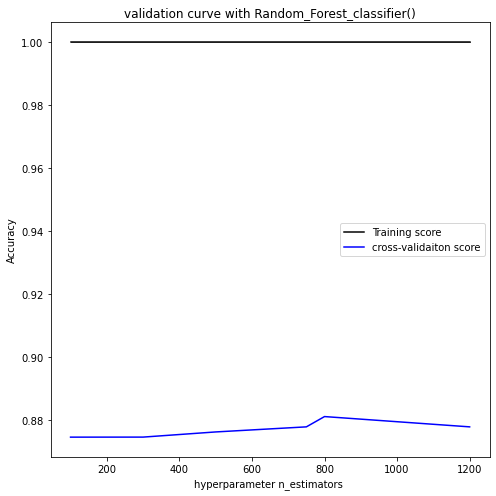

In [103]:
param_range = [100, 300, 500, 750, 800, 1200]
plot_learning_curve_rfc(X_train,y_train, param_range, 'n_estimators')

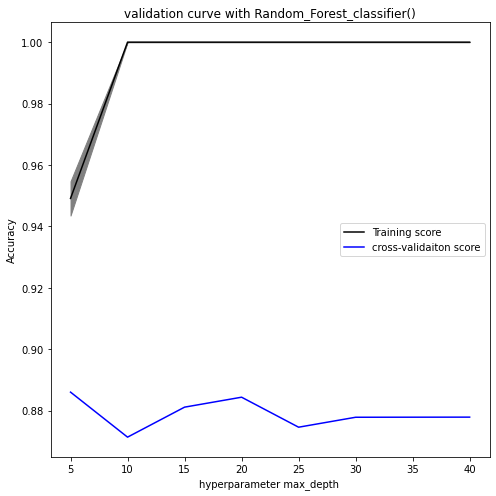

In [104]:
param_range = [5,10,15,20,25,30,40]
plot_learning_curve_rfc(X_train, y_train, param_range, 'max_depth')


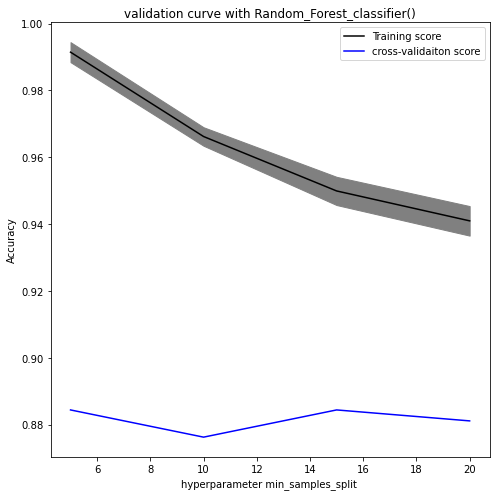

In [105]:
param_range = np.arange(5,25,5)
plot_learning_curve_rfc(X_train, y_train, param_range, 'min_samples_split')


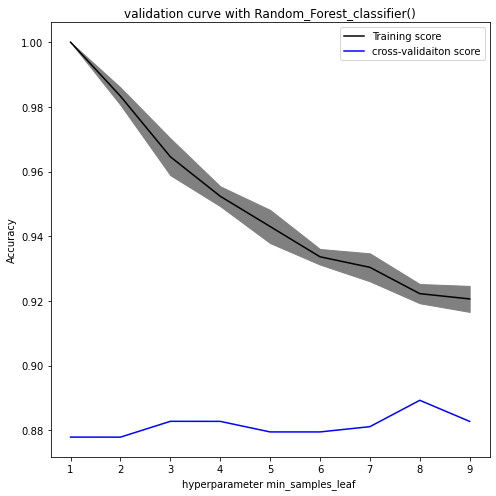

In [106]:
param_range = np.arange(1,10,1)
plot_learning_curve_rfc(X_train, y_train, param_range, 'min_samples_leaf')

In [107]:
gs_rfc.best_params_

{'max_depth': 40,
 'min_samples_leaf': 9,
 'min_samples_split': 6,
 'n_estimators': 1000}

In [108]:
forestVC = RandomForestClassifier(n_estimators=100,max_depth=5,min_samples_leaf=8, min_samples_split=4,
                                   random_state=24)

modelVC = forestVC.fit(X_train, y_train)
y_predVC = modelVC.predict(X_test)

In [109]:
print(classification_report(y_test, y_predVC))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91        98
           1       0.86      0.79      0.82        56

    accuracy                           0.88       154
   macro avg       0.87      0.86      0.86       154
weighted avg       0.88      0.88      0.88       154



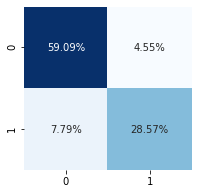

In [110]:
plot_conf_mat_labels(y_test, y_predVC)

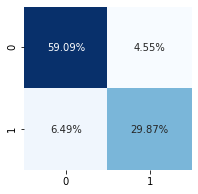

In [111]:
plot_conf_mat_labels(y_test, y_preds)

In [112]:
modelVC.score(X_test, y_test)

0.8766233766233766

In [113]:
gs_rfc.score(X_test, y_test)

0.8896103896103896

In [114]:
rf_grid = {
    'n_estimators': np.arange(100, 1000),
    'max_depth': [None, 5, 40],
    'min_samples_split': np.arange(2, 20, 2),
    'min_samples_leaf': np.arange(2,20, 2)
}

In [115]:
np.random.seed(24)

gs_rfc = GridSearchCV(estimator=RandomForestClassifier(),
                            param_grid=gs_grid,
                             cv=5,
                             verbose = True)

gs_rfc.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [40, 70],
                         'min_samples_leaf': array([ 1,  5,  9, 13, 17]),
                         'min_samples_split': array([ 2,  6, 10, 14, 18]),
                         'n_estimators': [1000]},
             verbose=True)

# same best param scores as before after adjusting it by hand 

In [116]:
gs_rfc.best_params_ # 

{'max_depth': 40,
 'min_samples_leaf': 9,
 'min_samples_split': 6,
 'n_estimators': 1000}

In [118]:
gs_rfc.score(X_test, y_test)

0.8896103896103896

# We came up 1% percent short of our evalution goal. 

